<a href="https://colab.research.google.com/github/sadoky/Base_de_datos_Scada_Solcast/blob/master/RED_GRU_intervalos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:


import numpy as np
np.random.seed(4)
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler






#[dataset['AirTemp'].iloc[0:8700]]

In [2]:
dataset=pd.read_csv('https://raw.githubusercontent.com/sadoky/Pandas/master/1.232462_-77.293538_Solcast_PT5M.csv')


In [3]:
set_entrenamiento1= (dataset["Ghi"].iloc[0:6000])
set_validacion1 = dataset["Ghi"].iloc[6000:8000]

In [4]:
sc = MinMaxScaler(feature_range=(0,1))
set_entrenamiento=set_entrenamiento1.values.reshape(-1,1)
set_entrenamiento_escalado = sc.fit_transform(set_entrenamiento)

In [5]:
time_step = 60
X_train = []
Y_train = []
m = len(set_entrenamiento_escalado)

for i in range(time_step,m):
    # X: bloques de "time_step" datos: 0-time_step, 1-time_step+1, 2-time_step+2, etc
    X_train.append(set_entrenamiento_escalado[i-time_step:i,0])

    # Y: el siguiente dato
    Y_train.append(set_entrenamiento_escalado[i,0])
X_train, Y_train = np.array(X_train), np.array(Y_train)

In [6]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [7]:
from keras.models import Sequential
from keras.layers import GRU, Dense

In [8]:
dim_entrada = (X_train.shape[1],1)
dim_salida = 1
na = 50

In [9]:
modelo = Sequential()

In [10]:
modelo.add(GRU(units=na, input_shape=dim_entrada))

In [11]:
modelo.add(Dense(units=dim_salida))

In [12]:
from keras.callbacks import learning_rate_schedule
modelo.compile(optimizer="adam", loss='mse')

In [13]:
history=modelo.fit(X_train,Y_train,epochs=20,batch_size=32,verbose=2)


Epoch 1/20
186/186 - 15s - loss: 0.0079 - 15s/epoch - 83ms/step
Epoch 2/20
186/186 - 7s - loss: 0.0015 - 7s/epoch - 40ms/step
Epoch 3/20
186/186 - 6s - loss: 0.0011 - 6s/epoch - 30ms/step
Epoch 4/20
186/186 - 5s - loss: 8.5230e-04 - 5s/epoch - 29ms/step
Epoch 5/20
186/186 - 6s - loss: 7.2733e-04 - 6s/epoch - 30ms/step
Epoch 6/20
186/186 - 5s - loss: 6.4264e-04 - 5s/epoch - 29ms/step
Epoch 7/20
186/186 - 5s - loss: 5.4730e-04 - 5s/epoch - 30ms/step
Epoch 8/20
186/186 - 5s - loss: 4.9590e-04 - 5s/epoch - 29ms/step
Epoch 9/20
186/186 - 5s - loss: 4.4023e-04 - 5s/epoch - 29ms/step
Epoch 10/20
186/186 - 5s - loss: 4.0098e-04 - 5s/epoch - 29ms/step
Epoch 11/20
186/186 - 5s - loss: 3.6216e-04 - 5s/epoch - 29ms/step
Epoch 12/20
186/186 - 6s - loss: 3.3552e-04 - 6s/epoch - 30ms/step
Epoch 13/20
186/186 - 6s - loss: 3.1629e-04 - 6s/epoch - 30ms/step
Epoch 14/20
186/186 - 6s - loss: 2.7634e-04 - 6s/epoch - 30ms/step
Epoch 15/20
186/186 - 5s - loss: 2.3775e-04 - 5s/epoch - 29ms/step
Epoch 16/20
18

In [14]:


history_dict = history.history
print(history_dict.keys())

dict_keys(['loss'])


In [15]:
x_test = set_validacion1.values
x_test=x_test.reshape(-1,1)
x_test = sc.transform(x_test)

In [16]:
X_test = []
for i in range(time_step,len(x_test)):
    X_test.append(x_test[i-time_step:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))

In [17]:
prediccion = modelo.predict(X_test)
prediccion = sc.inverse_transform(prediccion)
prediccion2=pd.DataFrame(prediccion)


In [18]:
prediccion2


,0
0,0.297090
1,0.302422
2,0.306827
3,0.310426
4,0.313282
...,...
1935,407.575775
1936,434.437531
1937,387.955170
1938,367.293488


In [19]:
xaxis=np.arange(start=0,stop=43500,step=5)



In [20]:
url='https://raw.githubusercontent.com/sadoky/Pandas/master/1.232462_-77.293538_Solcast_PT5M.csv'
df=pd.read_csv(url)
datos_train=df["Ghi"].iloc[0:6000]
datos_val=df["Ghi"].iloc[6000:8000]

datos_val


6000    476
6001    525
6002    488
6003    393
6004    391
       ... 
7995    419
7996    416
7997    385
7998    396
7999    434
Name: Ghi, Length: 2000, dtype: int64

In [21]:
from numpy.matrixlib.defmatrix import concatenate

j=np.zeros(6055,int)
pred44=pd.DataFrame(j)
pred56=np.asarray(prediccion2,dtype=np.float64)

pred56=pred56.reshape(-1,1)
pred57=j.reshape(-1,1)
pred56





array([[2.97089875e-01],
       [3.02421570e-01],
       [3.06827068e-01],
       ...,
       [3.87955170e+02],
       [3.67293488e+02],
       [4.22459717e+02]])

In [22]:
lim=np.concatenate((pred57,pred56))
lim
lim2=pd.DataFrame(lim)
prediccion_final=lim2[6000:]

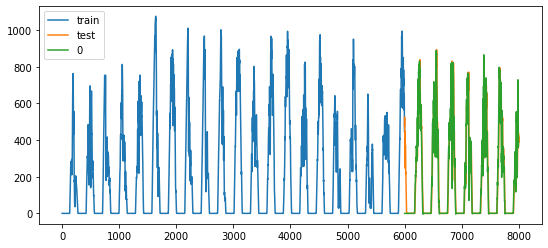

In [23]:
fig, ax = plt.subplots(figsize=(9, 4))
datos_train.plot(ax=ax, label='train')
datos_val.plot(ax=ax, label='test')
prediccion_final.plot(ax=ax,label="predict")

ax.legend();

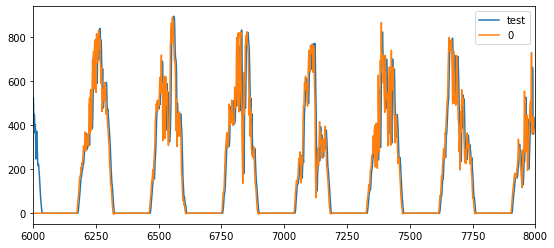

In [24]:
fig, ax = plt.subplots(figsize=(9, 4))
#datos_train.plot(ax=ax, label='train')
datos_val.plot(ax=ax, label='test')
lim2.plot(ax=ax, label='predict')
plt.xlim(6000,8000)
ax.legend();



